# **Data Exploration: Chronic Kidney Disease**

### Welcome to the section on Support Vector Machines (SVMs)! SVMs are one of the most vertaile machine learning models and have wide utility across both regression and classification tasks. They are a true staple in any data scientists tool kit and, to this day, are still used in very advanced applications. In this notebook we will be doing some initial visualization before moving on to builing our model.

### We will be making an SVM today for a classification task. Make sure you still remember the high level difference between classification and regression as this is guiding light when thinking about how to solve problems.

### - `Classification`- whether or not something belongs to a certain class (car, truck, plane)

### - `Regression`- prediction of a continuous variable (heart rate given certain parameters, post operative systolic blood pressure)

### Here, we will be doing `binary classification`, and attept to predict whether or not individuals will develop kidney disease from based on various clinical observations. The data is open source and can be found here: https://www.kaggle.com/datasets/mahmoudlimam/preprocessed-chronic-kidney-disease-dataset. 

### We won't go to in depth with describing the data here, but one thing of note is that this dataset is already heavily preprocessed so we will have a lot of work saved for us. Missing values were calculated using KNN (see the KNN notebook in this section for more information on this!) and the categorical variables are already one hot encoded. You can read more about the other preprocessing done here: https://www.kaggle.com/code/mahmoudlimam/chronic-kidney-disease-clustering-and-prediction/notebook.

### As the point of this specific section is to delve into SVMs, we felt OK using this dataset, but keep in mind that real world data is *never* this clean coming in and will always require you to do some form of preprocessing on it. Throughout all of Code Grand Rounds we show multiple different approaches to this preprocessing so it will be lighter in this section, but remember never to skip this step! Alright, without further ado lets dive in!

In [1]:
# Install and import all the neccessary stuff

%pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Note: you may need to restart the kernel to use updated packages.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Import the data and take a look at it

In [2]:
# Import the dataset
df = pd.read_csv('CKD_Preprocessed.csv')

# Display the first few rows of the dataset
df.head()

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),...,Pus Cells: normal,Pus Cell Clumps: present,Bacteria: present,Hypertension: yes,Diabetes Mellitus: yes,Coronary Artery Disease: yes,Appetite: poor,Pedal Edema: yes,Anemia: yes,Chronic Kidney Disease: yes
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,136.0,4.7,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,90.316581,18.0,0.8,140.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,135.0,4.8,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.0,2.5,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,140.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Get some basic summary statistics about the data. We will leave you to interpret these on your own.

In [3]:
# Get basic summary statistics for numerical columns
df.describe()

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),...,Pus Cells: normal,Pus Cell Clumps: present,Bacteria: present,Hypertension: yes,Diabetes Mellitus: yes,Coronary Artery Disease: yes,Appetite: poor,Pedal Edema: yes,Anemia: yes,Chronic Kidney Disease: yes
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.591123,76.300000,1.017449,0.935797,0.395000,146.005923,56.806872,3.022922,137.387860,4.569293,...,0.800000,0.105000,0.055000,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.625000
std,17.042814,13.593084,0.005597,1.311653,1.040038,76.422249,49.808436,5.631037,9.273123,2.829638,...,0.400501,0.306937,0.228266,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,100.000000,27.000000,0.900000,135.000000,3.900000,...,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,119.491153,41.000000,1.300000,138.000000,4.400000,...,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,65.000000,80.000000,1.020000,2.000000,0.000000,159.250000,65.250000,2.800000,141.000000,4.900000,...,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### Get some info about data types and probe number of missing (null) values

In [4]:

# Get info about data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       400 non-null    float64
 1   Blood Pressure (mm/Hg)          400 non-null    float64
 2   Specific Gravity                400 non-null    float64
 3   Albumin                         400 non-null    float64
 4   Sugar                           400 non-null    float64
 5   Blood Glucose Random (mgs/dL)   400 non-null    float64
 6   Blood Urea (mgs/dL)             400 non-null    float64
 7   Serum Creatinine (mgs/dL)       400 non-null    float64
 8   Sodium (mEq/L)                  400 non-null    float64
 9   Potassium (mEq/L)               400 non-null    float64
 10  Hemoglobin (gms)                400 non-null    float64
 11  Packed Cell Volume              400 non-null    float64
 12  White Blood Cells (cells/cmm)   400 

## **Initial Visualizations**

### Make histogram of all the data to see the distribution. Our data is all numerical (as seen by df.info) so a single histogram should suffice. For the binary data (1s or 0s) we want to see if there is a relatively even distribution of both 1s and 0s, particularly for our target (CKD status)

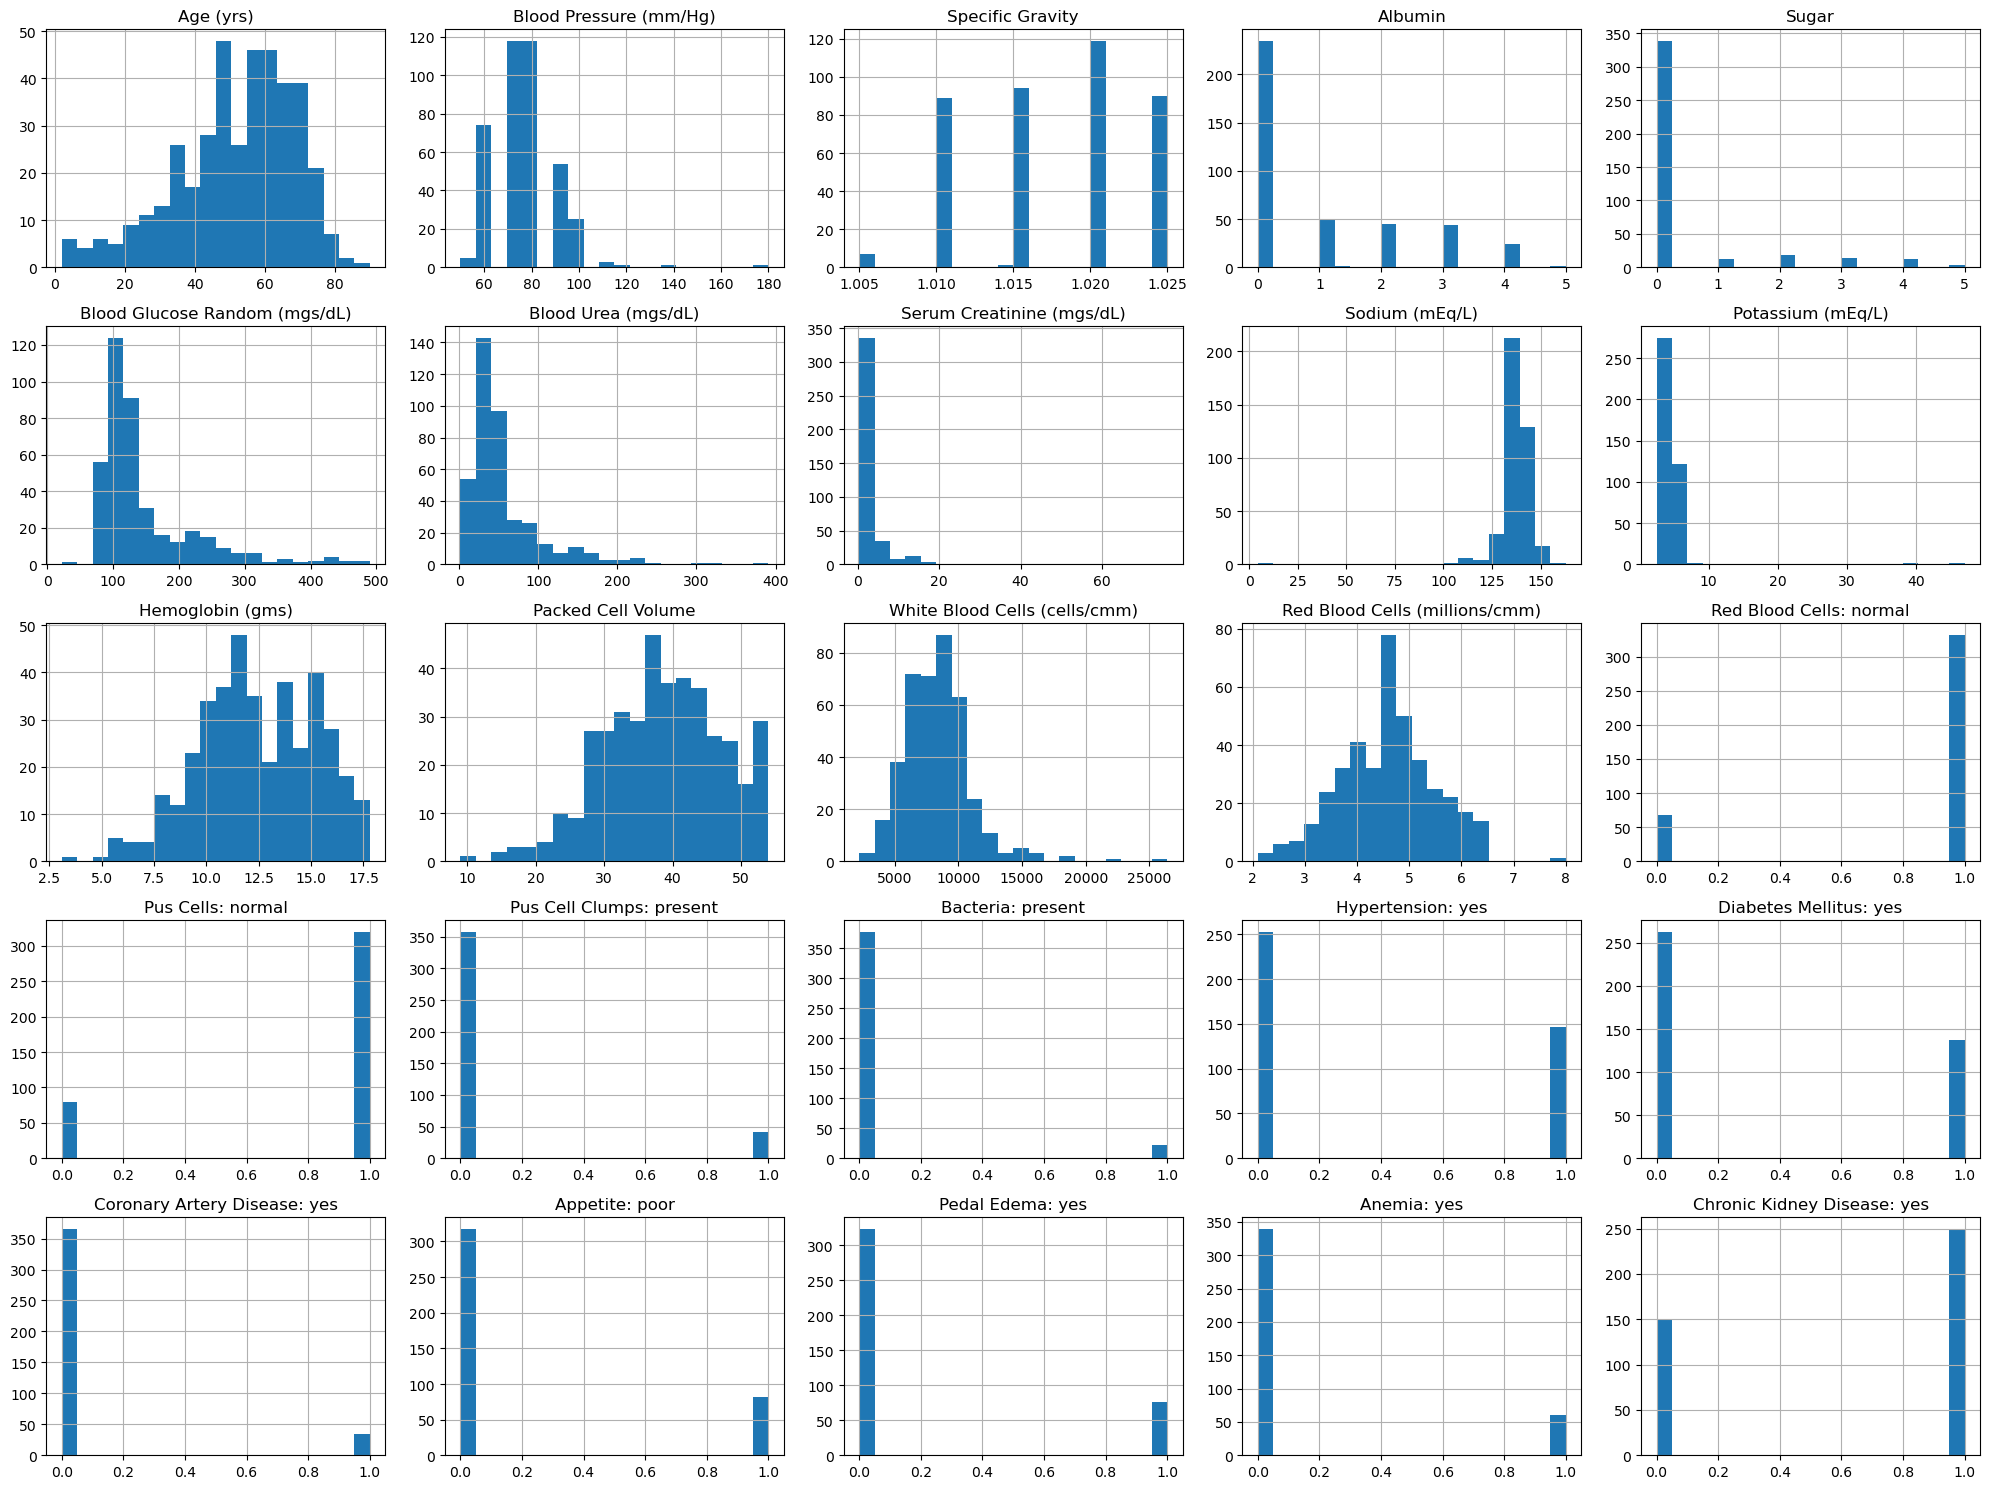

In [5]:
# Select only the columns with datatypes 'float64' and 'int64' from the DataFrame 'df'.
# For these selected columns, create histograms.
# figsize=(20,15) sets the width and height of the entire figure in inches.
# bins=20 means each individual histogram will have 20 bins.
df.select_dtypes(include=['float64', 'int64']).hist(figsize=(20,15), bins=20)

# Adjust the padding between and around the subplots (histograms) for a cleaner look.
plt.tight_layout()

# Display the figure containing the histograms.
plt.show()


### We will leave the interpretation of a majority of these data up to you, but we want to briefly discuss our target vairable 'Chronic Kidney Disease: Yes'. 

### We see from the histogram in the bottom right that 250 people with kidney disease and 150 without. In this case the majority class is people with kidney disease, but this still about a 5:3 class imbalance. As indicated in the logistic regression, imbalanced classes can be a big problem in machine learning (particular classification tasks) as they can accidentally bias the model towards the majority class. This can falsely lead you to an increase in accuracy when your model is actually just predicting the majority class a majority of the time and achieving what seems like a good result. This is why it is imperative to always check other metrics like precision, recall, AUROC, etc., and be sure to think critically about the distribution of your data. We need to keep this potential imbalance in mind going forward!

## More data visualization

### While this might not be strictly neccesary (although always a good idea...), but lets also make a correlation matrix to see if any of our features are highly correlated. This is the same code from the data exploration notebook in module 2!

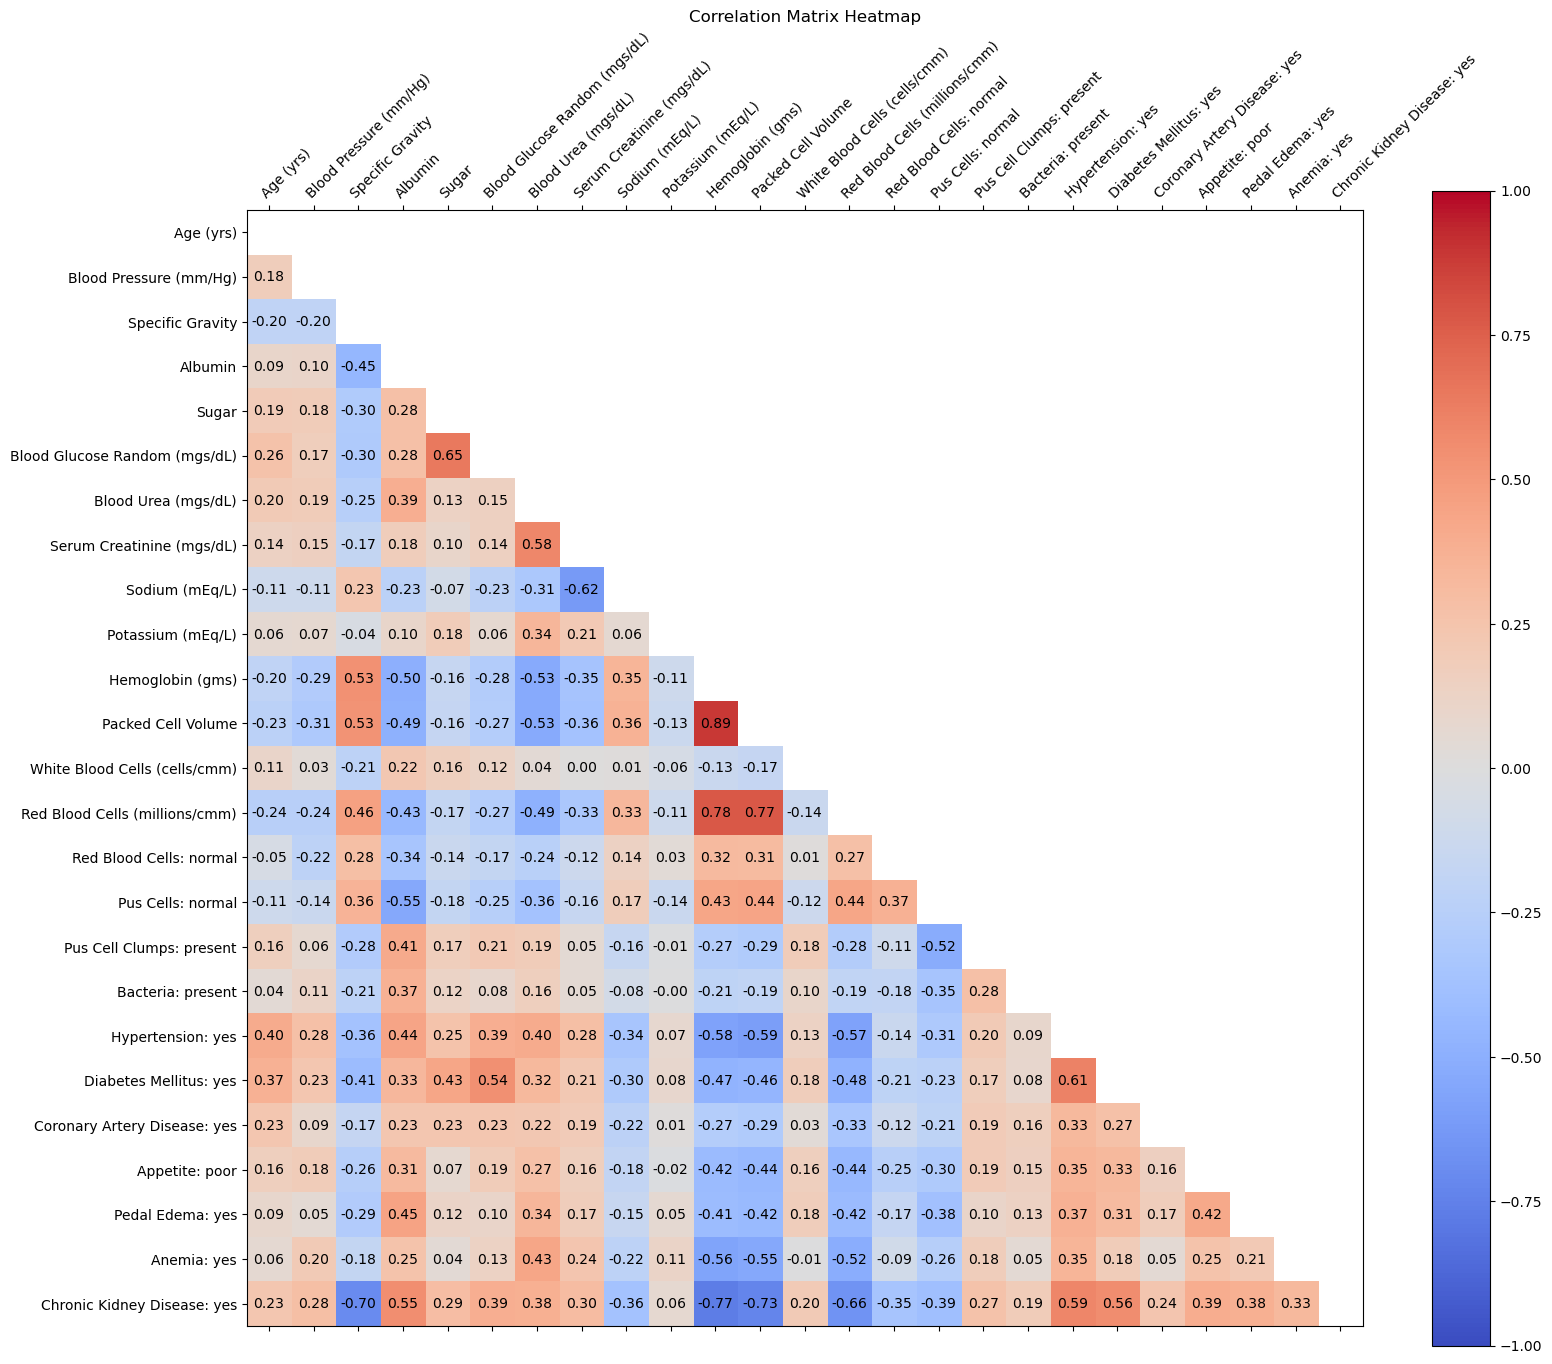

In [6]:
# corr_matrix = df.corr() # This line computes the correlation matrix of the DataFrame.
#                  #  It calculates the Pearson correlation coefficient for each pair of numerical columns. 
#                  # Post cleaning, all of our columns have some kind of numerical representation.

# print (corr_matrix)

# # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) #  Here, create a mask for the upper triangle of your correlation matrix. 
#                                                # This is done because the matrix is symmetric, i.e., the lower triangle is a mirror 
#                                                # image of the upper triangle. Thus, showing both would be redundant.
#                                                # You don't technially need to do this, but its a nice trick...

# # Set up the matplotlib figure
# fig, ax = plt.subplots(figsize=(18, 15))

# # Generate a colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # Draw the heatmap with the mask
# # Look at the sns documenttion for details on all of the arguments. 
# sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# plt.title('Correlation Matrix Heatmap')
# plt.show()



In [ ]:
# For website- seaborn is generally an easier way to make heatmaps
# Assuming your df is already loaded
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Convert the mask to NaN values where True (for upper triangle)
masked_array = np.where(mask, np.nan, corr_matrix)

# Create the colormap. You might want to tweak the values for your specific use case.
cmap = plt.get_cmap("coolwarm")

fig, ax = plt.subplots(figsize=(18, 15))

# Using matshow here to create the heatmap, tweak vmin/vmax to fit the range you want
cax = ax.matshow(masked_array, cmap=cmap, vmin=-1, vmax=1)

# Display the correlation values on each cell
for (i, j), z in np.ndenumerate(masked_array):
    if not np.isnan(z):  # Only print the lower triangle values
        ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')

# To show the colorbar on the side
fig.colorbar(cax)

# Set the ticks with the column names
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)
plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")

ax.set_title('Correlation Matrix Heatmap')
plt.show()


### While we will not do a detailed assessment of this data, right away we can see that there are many features that seem to be highly correlated with our target variable. This could mean that we may be able to achieve good predictive power with this dataset, but it is also worth noting that multicollinearity can sometimes lead to overfitting. But overall, this looks good!   

## **Moving on**

### That is really all we are going to do here. As this is a special dataset because it was pretty heavily preprocessed for us (as you know by now, this will definitely not always be the case...), we just wanted to take an initial look to 'get to know' the data before we run off and try to build models for it. Knowing the distribution is important because certain models require certain distributions to work properly, and it is always nice to know if things correlate and kind of 'make sense' within your dataset. Lets go make a model!